In [1]:
import networkx as nx
import numpy as np
import pylab as plt
import scipy as sc

from RBS import RBS_matrix
from RMST import RMST
import MarkovStability as ms

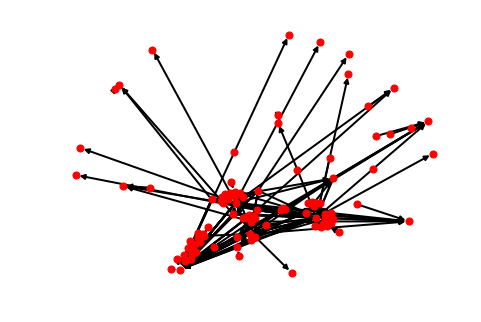

In [2]:
#create directed graph
G = nx.scale_free_graph(100)
plt.figure()
pos = nx.spring_layout(G,weight=None,scale=1)

nx.draw(G, pos=pos,width = 2, node_size=50)

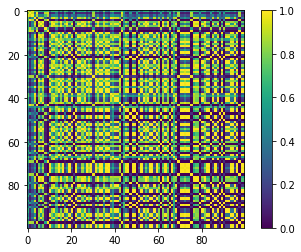

In [3]:
#compute RBS matrix
Y = RBS_matrix(G,10,0.9)

plt.figure()
plt.imshow(Y.todense())
plt.colorbar()

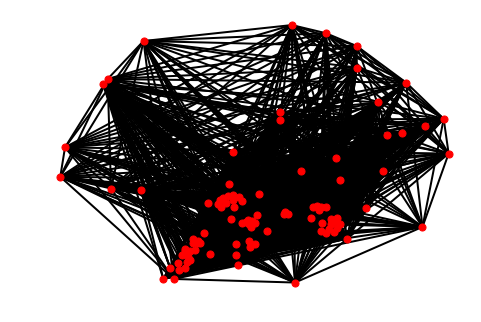

In [4]:
#draw the simalarity graph
G_RBS = nx.Graph(Y)
plt.figure()
nx.draw(G_RBS, pos=pos,width = 2, node_size=50)

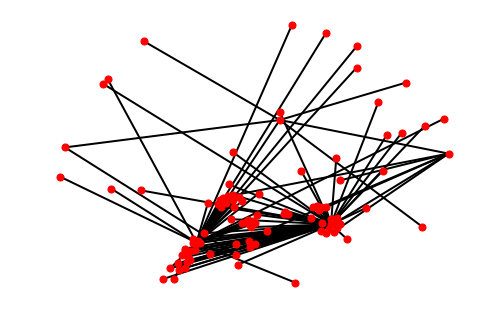

In [5]:
#draw the MST graph
G_MST = nx.minimum_spanning_tree(G_RBS)
plt.figure()
nx.draw(G_MST, pos=pos,width = 2, node_size=50)

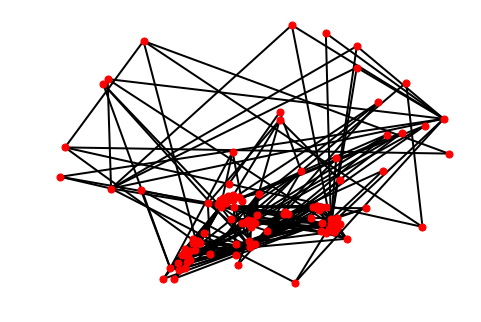

In [6]:
#draw the RMST graph
G_RMST = RMST(G_RBS,0.5)
plt.figure()
nx.draw(G_RMST, pos=pos,width = 2, node_size=50)

In [7]:
#start the linear and markov stability
louvain_runs = 20
precision = 1e-5
stab_markov = ms.Stability(G_RMST,'Markov_Normalised',louvain_runs, precision, True)
stab_linear = ms.Stability(G_RMST,'Linear',louvain_runs , precision, True)

CPU times: user 9.4 s, sys: 24 ms, total: 9.42 s
Wall time: 9.4 s


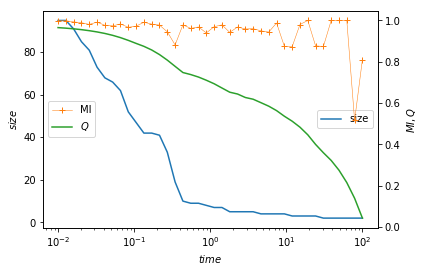

In [8]:
#run a scan of linear stability
times = np.logspace(-2,2,40)
%time stab_linear.scan_stability(times,disp=False)
stab_linear.plot_scan()

CPU times: user 12.3 s, sys: 40 ms, total: 12.4 s
Wall time: 12.3 s


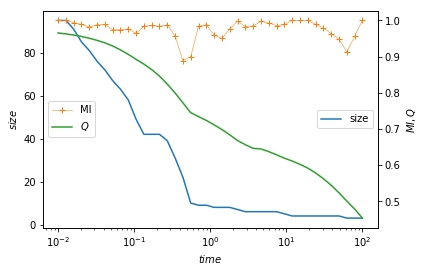

In [9]:
#run the Markov stability
%time stab_markov.scan_stability(times,disp=False)
stab_markov.plot_scan()

In [10]:
print('Markov times:\n',stab_markov.stability_results['Markov time'])

Markov times:
 0       0.010000
1       0.012664
2       0.016037
3       0.020309
4       0.025719
5       0.032570
6       0.041246
7       0.052233
8       0.066147
9       0.083768
10      0.106082
11      0.134340
12      0.170125
13      0.215443
14      0.272833
15      0.345511
16      0.437548
17      0.554102
18      0.701704
19      0.888624
20      1.125336
21      1.425103
22      1.804722
23      2.285464
24      2.894266
25      3.665241
26      4.641589
27      5.878016
28      7.443803
29      9.426685
30     11.937766
31     15.117751
32     19.144820
33     24.244620
34     30.702906
35     38.881552
36     49.238826
37     62.355073
38     78.965229
39    100.000000
Name: Markov time, dtype: float64


6 communities


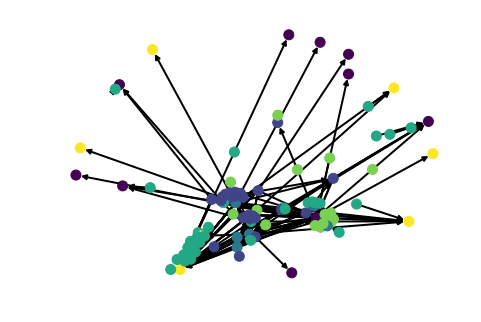

In [17]:
#plot the communities
comm = 28 #which community number
community_labels = stab_markov.stability_results['community_id'][comm] #select the labels

print(stab_markov.stability_results['number_of_communities'][comm],"communities")
plt.figure()
nx.draw(G,pos=pos,node_color=community_labels, width = 2, node_size=100)